In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns


In [ ]:
                            #IRIS

In [47]:
iris = sns.load_dataset('iris')
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


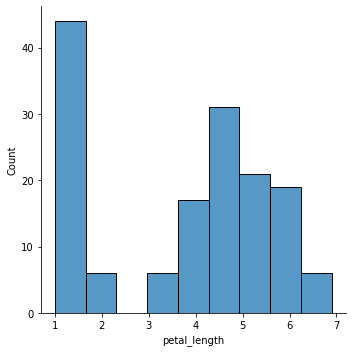

In [65]:
# What does the distribution of petal lengths look like?
# iris.petal_length.describe()
sns.displot(data = iris, x='petal_length')

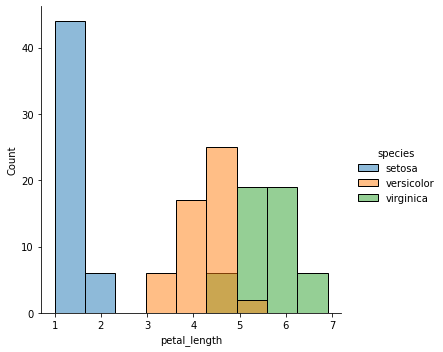

In [51]:
sns.displot(data=iris, x ='petal_length',kind='hist', hue='species')

In [22]:
# Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
iris.corr()
   ## petal_length and petal_width are correlated as the value stands 0.963

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [69]:
petal = pd.crosstab(iris.corr().petal_length, iris.corr().petal_width)
petal

petal_width,-0.366126,0.817941,0.962865,1.000000
petal_length,,,,
-0.428440,1,0,0,0
0.871754,0,1,0,0
0.962865,0,0,0,1
1.000000,0,0,1,0


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

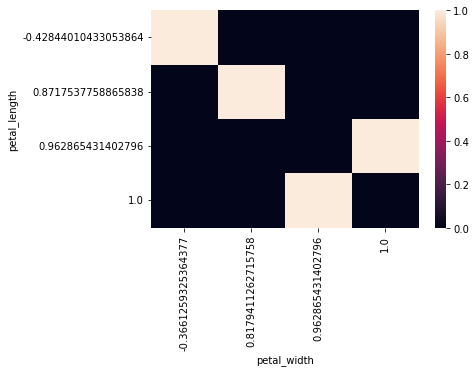

In [70]:
sns.heatmap(petal,annot=False)

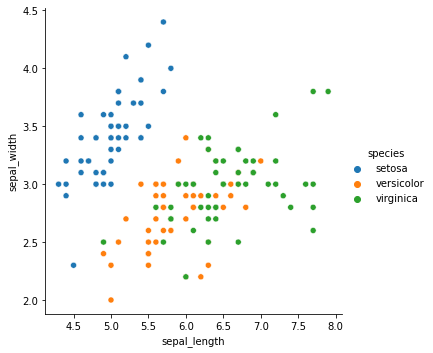

In [67]:
# Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.
           # sepal length and sepalwidth are are not best for predicting species.
sns.relplot(data= iris, x ='sepal_length', y='sepal_width', hue='species')

In [73]:
sepals_corr = pd.crosstab(iris.corr().sepal_length, iris.corr().sepal_width)
sepals_corr

sepal_width,-0.428440,-0.366126,-0.117570,1.000000
sepal_length,,,,
-0.117570,0,0,0,1
0.817941,0,1,0,0
0.871754,1,0,0,0
1.000000,0,0,1,0


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

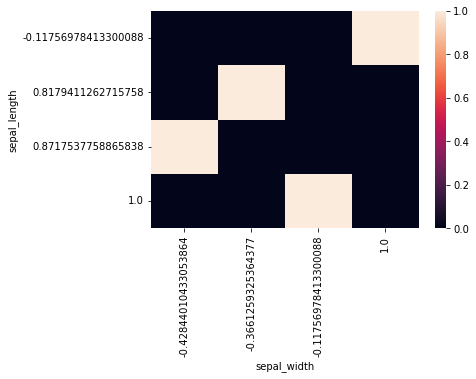

In [78]:
sns.heatmap(sepals_corr)

In [ ]:
# Which features would be best used to predict species?
            # ans. 'petal_length'

In [ ]:
                        
    
                                #anscombe
    
    
    
    
    

In [30]:
#  use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, 
# and calculate summary statistics for each dataset. What do you notice?
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [80]:
anscombe.groupby('dataset').agg('count')

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [38]:
anscombe.groupby('dataset').describe().reset_index()

dataset     x                                               y            \
          count mean       std  min  25%  50%   75%   max count      mean   
0       I  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
1      II  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2     III  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
3      IV  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                             
        std   min    25%   50%   75%    max  
0  2.031568  4.26  6.315  7.58  8.57  10.84  
1  2.031657  3.10  6.695  8.14  8.95   9.26  
2  2.030424  5.39  6.250  7.11  7.98  12.74  
3  2.030579  5.25  6.170  7.04  8.19  12.50

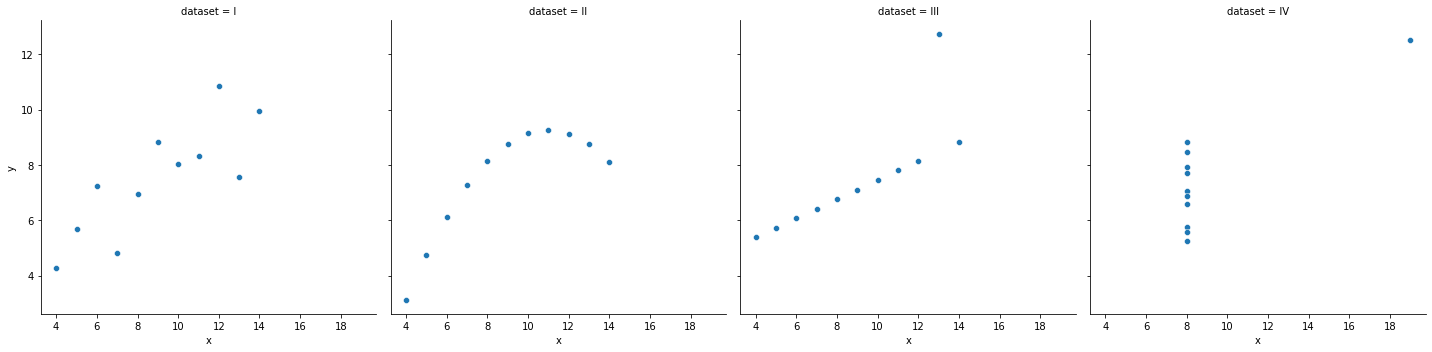

In [81]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data= anscombe, x='x', y='y',col='dataset')


In [95]:
                                        #Insectsprays
insect_sprays = data('InsectSprays')

In [96]:
# read it's documentation
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [97]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

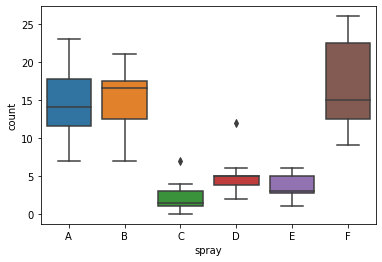

In [100]:

#Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data=insect_sprays, x='spray', y='count')

In [104]:
                    #SWISS
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [107]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic >= 55
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

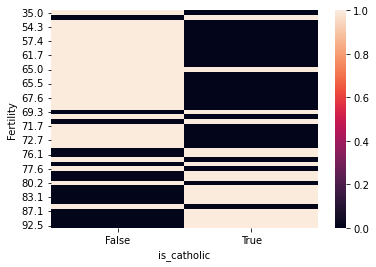

In [112]:
# Does whether or not a province is Catholic influence fertility?
swiss_corr = pd.crosstab(swiss.Fertility, swiss.is_catholic)
swiss_corr.head()
sns.heatmap(swiss_corr)

In [ ]:
# What measure correlates most strongly with fertility?


In [118]:
                                ##Q.no. 4

#Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items and the revenue produced by each.
def get_db_url(username,password,host,d):
    url = f'mysql+pymysql://{username}:{password}@{host}/{d}'
    return url

from env import host, username, password

In [125]:
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url(username,password,host,'chipotle'))
chipotle.head()


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [137]:
chipotle['dollarize_price'] = (chipotle['item_price'].str.strip('$')).astype('float')

chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,dollarize_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


In [179]:
most_popular = chipotle.groupby(by="item_name").sum(['quantity','doallarize_price']).sort_values(by='quantity',ascending=False)
most_popular.head(4)

,id,order_id,quantity,dollarize_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


In [182]:
most_popular.dtypes
four = most_popular.head(4)
four
# converted the dataframe to only four items

,id,order_id,quantity,dollarize_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


<AxesSubplot:xlabel='quantity', ylabel='dollarize_price'>

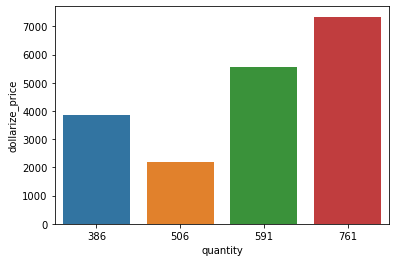

In [183]:
sns.barplot(data= four,x='quantity',y='dollarize_price')

In [166]:
                        ## q.no.5

# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual
# subject's reaction times and a more prominant line showing the average change in reaction time.

sleepstudy=data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [146]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [148]:
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

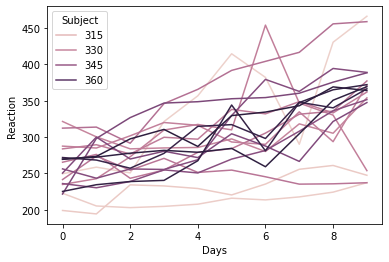

In [153]:
sns.lineplot(data=sleepstudy, x='Days', y='Reaction',hue='Subject')